In [48]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as web

import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import os


In [49]:
start = dt.datetime(2017,1,1)



stockList = ['^BVSP','PETR4.SA']

df = pd.DataFrame()
df_aux = pd.DataFrame()
for i in stockList:
    df_aux = web.DataReader(i, 'yahoo', start)
    nome_coluna = []
    for x in df_aux.columns:
        nome_coluna.append(str(i)+'_'+str(x))
    df_aux.columns=nome_coluna
    df = pd.concat([df, df_aux], axis=1)

In [55]:
df['prediction'] = df['PETR4.SA_Adj Close'].shift(-1)
df.dropna(inplace=True)
X = df.drop(['prediction'], 1)
Y = np.array(df['prediction'])
#X_proc = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8)

In [56]:
#Performing the Regression on the training data
clf = RandomForestRegressor(max_depth=50, random_state=0,n_estimators=100, n_jobs = -1)
clf.fit(X_train, Y_train)
prediction = (clf.predict(X))

print('Score train {}'.format(clf.score(X_train,Y_train)))
print('Score test {}'.format(clf.score(X_test,Y_test)))
print('Score full {}'.format(clf.score(X,Y)))

Score train 0.9979956844895087
Score test 0.9874197254508534
Score full 0.9893360292372232


In [57]:
df['pred'] = prediction
df['prediction'] = df['prediction'].shift(+num_days)
df['pred'] = df['pred'].shift(+num_days)
df['Data'] = df.index
df.tail()

,^BVSP_High,^BVSP_Low,^BVSP_Open,^BVSP_Close,^BVSP_Volume,^BVSP_Adj Close,PETR4.SA_High,PETR4.SA_Low,PETR4.SA_Open,PETR4.SA_Close,PETR4.SA_Volume,PETR4.SA_Adj Close,prediction,pred,Data
Date,,,,,,,,,,,,,,,
2019-08-02,103180.0,101667.0,102122.0,102674.0,4923500.0,102674.0,26.889999,26.280001,26.370001,26.520000,64112900.0,26.520000,26.520000,26.130057,2019-08-02
2019-08-05,102658.0,99630.0,102658.0,100098.0,5000400.0,100098.0,26.129999,25.520000,25.799999,25.549999,48277000.0,25.549999,25.549999,26.391339,2019-08-05
2019-08-06,102178.0,100098.0,100098.0,102164.0,5074800.0,102164.0,26.219999,25.680000,25.900000,25.879999,44208100.0,25.879999,25.879999,25.281465,2019-08-06
2019-08-07,102784.0,100476.0,102163.0,102782.0,5570600.0,102782.0,25.730000,25.000000,25.440001,25.600000,67698500.0,25.600000,25.600000,25.514796,2019-08-07
2019-08-08,104282.0,102811.0,102811.0,104115.0,5538300.0,104115.0,26.350000,25.860001,26.100000,26.350000,50256700.0,26.350000,26.350000,25.147220,2019-08-08


C:\Users\renan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


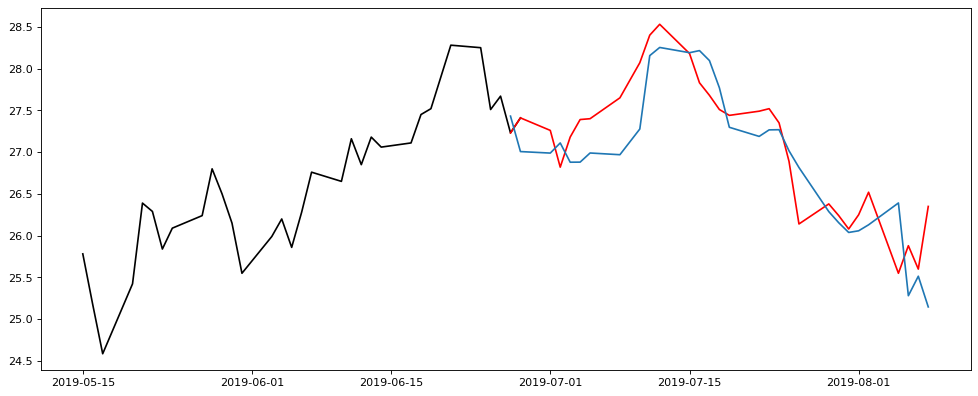

In [58]:
last_x_days = 30
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df['Data'].iloc[-last_x_days*2:-last_x_days+2], df['PETR4.SA_Adj Close'].iloc[-last_x_days*2:-last_x_days+2], color = 'black')
plt.plot(df['Data'].iloc[-last_x_days:], df['prediction'].iloc[-last_x_days:], color = 'red')
plt.plot(df['Data'].iloc[-last_x_days:], df['pred'].iloc[-last_x_days:])
plt.show()

In [39]:
feature = clf.feature_importances_
for x,y in zip(X.columns,feature):
    print(x,' ',y*100)

^BVSP_High   0.03275034431997009
^BVSP_Low   0.04960105478937565
^BVSP_Open   0.04472507748623996
^BVSP_Close   0.05406547702511874
^BVSP_Volume   0.06844226473286194
^BVSP_Adj Close   0.05669481371670497
PETR4.SA_High   10.654006911123375
PETR4.SA_Low   22.60482281984742
PETR4.SA_Open   4.991672579729327
PETR4.SA_Close   21.156590264721075
PETR4.SA_Volume   0.07531175015820286
PETR4.SA_Adj Close   40.21131664235033
